<br><br><br><br><br>

# uproot: Python-native ROOT I/O

<br><br><br><br><br>

<br><br><br><br>

<center><img src="img/uproot-logo.png" width="40%"></center>

<br><br><br><br>

<br>

<p style="font-size: 1.25em">Reminder: uproot is a reimplementation of ROOT I/O in Python, using Numpy for speed and awkward-array to represent complex data.</p>

<br>

<center><img src="img/abstraction-layers.png" width="80%"></center>

<br>

In [1]:
# We've been using uproot for many of our examples so far.
# As a re-write of ROOT I/O in Python, uproot presents the data in a Pythonic way:

import uproot, numpy
file = uproot.open("http://scikit-hep.org/uproot/examples/nesteddirs.root")

print("file is a read-only dict, from object names to objects:\n")
print(f"file.keys()                  → {file.keys()}\n")
print(f"file['one'].keys()           → {file['one'].keys()}\n")
print(f"file['one']['two'].classes() → {dict(file['one']['two'].classes())}\n")
print(f"file['one']['two']['tree']   → {file['one']['two']['tree']}\n")
print(f"file['one/two/tree']         → {file['one/two/tree']}")

file is a read-only dict, from object names to objects:

file.keys()                  → [b'one;1', b'three;1']

file['one'].keys()           → [b'two;1', b'tree;1']

file['one']['two'].classes() → {b'tree;1': <class 'uproot.rootio.TTree'>}

file['one']['two']['tree']   → <TTree b'tree' at 0x7ba3040ccdd8>

file['one/two/tree']         → <TTree b'tree' at 0x7ba328077160>


In [2]:
# TBranches of TTrees are also presented as dicts.
events = uproot.open("data/Zmumu.root")["events"]
events.keys()

[b'Type',
 b'Run',
 b'Event',
 b'E1',
 b'px1',
 b'py1',
 b'pz1',
 b'pt1',
 b'eta1',
 b'phi1',
 b'Q1',
 b'E2',
 b'px2',
 b'py2',
 b'pz2',
 b'pt2',
 b'eta2',
 b'phi2',
 b'Q2',
 b'M']

In [3]:
# Get an array with TBranch.array().

events["E1"].array()

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [4]:
# Or TTree.array(branchname).

events.array("E1")

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [5]:
# The plural form, arrays, returns a dict from branch names to arrays.

events.arrays("E1")

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735])}

In [6]:
# You get the arrays you ask for.

events.arrays(["E1", "px1", "py1", "pz1"])

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [7]:
# With wildcards.

events.arrays(["E1", "p[xyz]1"])

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [8]:
# These are the same wildcard patterns as matching files in UNIX.

events.arrays(["E1", "p*1"])

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247]),
 b'pt1': array([44.7322, 38.8311, 38.8311, ..., 32.3997, 32.3997, 32.3997]),
 b'phi1': array([ 2.74126  , -0.440873 , -0.440873 , ...,  0.0370275,  0.0370275,
         0.0370275])}

In [9]:
# Or with slashes, they become regular expressions.

events.arrays(["E1", "/p.*[0-1]/"])

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247]),
 b'pt1': array([44.7322, 38.8311, 38.8311, ..., 32.3997, 32.3997, 32.3997]),
 b'phi1': array([ 2.74126  , -0.440873 , -0.440873 , ...,  0.0370275,  0.0370275,
         0.0370275])}

In [10]:
# The "b" before each string (for bytestring) can be removed in Python 3 by
# specifying an encoding (strings in ROOT have no default encoding).

events.arrays(["E1", "px1", "py1", "pz1"], namedecode="utf-8")

{'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [11]:
# And we can change the container from a dict to something else by passing a
# class name; tuple is useful because it lets us assign each array.

E, px, py, pz = events.arrays(["E1", "px1", "py1", "pz1"], outputtype=tuple)

In [12]:
# outputtype=pandas.DataFrame is a synonym for TTree.pandas.df.

import pandas
events.arrays(["E1", "px1", "py1", "pz1"], outputtype=pandas.DataFrame)

,E1,px1,py1,pz1
entry,,,,
0,82.201866,-41.195288,17.433244,-68.964962
1,62.344929,35.118050,-16.570362,-48.775247
2,62.344929,35.118050,-16.570362,-48.775247
3,60.621875,34.144437,-16.119525,-47.426984
4,41.826389,22.783582,15.036444,-31.689894
5,48.981407,-19.862307,-9.204225,43.817098
6,48.981407,-19.862307,-9.204225,43.817098
7,49.760726,-20.177373,-9.354149,44.513955
8,132.780755,71.143711,29.542308,-108.150553


In [13]:
# Use an explicit cache to avoid reading many times from the same file.

uproot.asdtype.debug_reading = True

print("asking for array...")
events.array("E1")

mycache = {}    # or maybe uproot.ArrayCache("1 GB")

print("asking for it with a cache...")
events.array("E1", cache=mycache)

print("asking for it again...")
events.array("E1", cache=mycache)

uproot.asdtype.debug_reading = False

asking for array...
reading array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])
asking for it with a cache...
reading array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])
asking for it again...


<br>

<p style="font-weight: bold; font-size: 1.875em; color: gray">Three ways to get data:</p>

<table width="100%" style="font-size: 1.25em"><tr style="background: white;">
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Read the file and return an array.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id11">TBranch.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#array">TTree.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#arrays">TTree.arrays</a></li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Get an object that reads on demand.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id13">TBranch.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarray">TTree.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarrays">TTree.lazyarrays</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarray</a>*</li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarrays</a>*</li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Read arrays in batches of entries.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#iterate">TTree.iterate</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-iterate">uproot.iterate</a>*</li>
        </ul>
    </td>
</tr></table>

<p>*Lazy arrays or iteration over sets of files.</p>

In [14]:
# Direct:

events.array("E1")

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [15]:
# Lazy:

uproot.asdtype.debug_reading = True

print("getting lazy array...")
lazyarray = events.lazyarray("E1", entrysteps=500)
print(f"len(lazyarray.chunks) = {len(lazyarray.chunks)}")

print("before looking at the array...")
print(f"lazyarray = {lazyarray}")
print(f"chunks read = {[x.ismaterialized for x in lazyarray.chunks]}")

print("before computing a value...")
print(f"numpy.sqrt(lazyarray) = {numpy.sqrt(lazyarray)}")

print("before computing another value...")
print(f"lazyarray**2 = {numpy.sqrt(lazyarray)}")

uproot.asdtype.debug_reading = False

getting lazy array...
len(lazyarray.chunks) = 5
before looking at the array...
reading array([ 82.20186639,  62.34492895,  62.34492895,  60.62187459,
        41.82638891,  48.98140695,  48.98140695,  49.76072566,
       132.78075492,  88.07833019,  88.07833019,  87.79565929,
        48.61914427,  46.40435116,  46.40435116,  46.51991282,
        57.36815016,  80.8941568 ,  80.8941568 ,  81.31144951,
        79.48779395,  50.50759651,  50.50759651,  50.59211055,
        41.47090944,  55.39297755,  55.39297755,  55.54290677,
       112.8839809 ,  31.41995067,  31.41995067,  31.42339926,
        73.34548002,  33.0810183 ,  33.0810183 ,  32.45151863,
        36.76969687,  78.54927722,  78.54927722,  76.95658284,
        71.38162765,  37.11945042,  37.11945042,  37.10875051,
        41.34095485,  41.21802884,  41.21802884,  14.25833323,
        14.25833323,  14.25833323,  14.25833323,  41.2330742 ,
       105.725502  ,  68.35271716,  68.35271716,  68.45669076,
       196.16113519,  29.909979

In [16]:
# Iterative:

for arrays in events.iterate("E1", entrysteps=500):
    print(arrays)

{b'E1': array([ 82.20186639,  62.34492895,  62.34492895,  60.62187459,
        41.82638891,  48.98140695,  48.98140695,  49.76072566,
       132.78075492,  88.07833019,  88.07833019,  87.79565929,
        48.61914427,  46.40435116,  46.40435116,  46.51991282,
        57.36815016,  80.8941568 ,  80.8941568 ,  81.31144951,
        79.48779395,  50.50759651,  50.50759651,  50.59211055,
        41.47090944,  55.39297755,  55.39297755,  55.54290677,
       112.8839809 ,  31.41995067,  31.41995067,  31.42339926,
        73.34548002,  33.0810183 ,  33.0810183 ,  32.45151863,
        36.76969687,  78.54927722,  78.54927722,  76.95658284,
        71.38162765,  37.11945042,  37.11945042,  37.10875051,
        41.34095485,  41.21802884,  41.21802884,  14.25833323,
        14.25833323,  14.25833323,  14.25833323,  41.2330742 ,
       105.725502  ,  68.35271716,  68.35271716,  68.45669076,
       196.16113519,  29.90997935,  29.90997935,   8.67840117,
         8.67840117,   8.67840117,   8.67840117

<br><br>

<p style="font-weight: bold; font-size: 1.875em; color: gray">Advantages and disadvantages of each:</p>

<table width="100%" style="font-size: 1.25em"><tr style="background: white;">
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Simple; returns pure Numpy arrays if possible.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Transparently work on data too large to fit into memory.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Control the loading of data into and out of memory.</p>
    </td>
</tr></table>

In [17]:
# Controlling the chunk size:

print("Lazy or iteration steps as a fixed number of entries:")
for arrays in events.iterate(entrysteps=500):
    print(len(arrays[b"E1"]))

print("\nLazy or iteration steps as a fixed memory footprint:")
for arrays in events.iterate(entrysteps="100 kB"):
    print(len(arrays[b"E1"]))

Lazy or iteration steps as a fixed number of entries:
500
500
500
500
304

Lazy or iteration steps as a fixed memory footprint:
717
717
717
153


In [18]:
# Reading complex data: mostly simplified by the fact that C++ classes are "split"
# into TBranches, and most TBranches are simple arrays.

tree = uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["T"]
tree.show()

# branch name              streamer type, if any      uproot's interpretation

event                      TStreamerInfo              None
TObject                    TStreamerInfo              None
fUniqueID                  TStreamerBasicType         asdtype('>u4')
fBits                      TStreamerBasicType         asdtype('>u4')

fType[20]                  TStreamerBasicType         asdtype("('i1', (20,))")
fEventName                 TStreamerBasicType         asstring(4)
fNtrack                    TStreamerBasicType         asdtype('>i4')
fNseg                      TStreamerBasicType         asdtype('>i4')
fNvertex                   TStreamerBasicType         asdtype('>u4')
fFlag                      TStreamerBasicType         asdtype('>u4')
fTemperature               TStreamerBasicType         asdtype('>f4', 'float64')
fMeasures[10]              TStreamerBasicType         asdtype("('>i4', (10,))")
fMatrix[4][4]              TStreamerBasicType         asdtype("('>f4', (4, 4))", "('<f8', (4, 4))")
fClosestDistance           TStreamerBasicPointer      None
fEv

In [19]:
# In this view, class attributes are NOT special types; they're just numbers.

tree.array("fTemperature", entrystop=20)

array([20.28261757, 20.47114182, 20.5931778 , 20.5848484 , 20.80287933,
       20.2972393 , 20.30301666, 20.87490845, 20.56552505, 20.67128181,
       20.74524879, 20.85200119, 20.26188469, 20.82903862, 20.02412415,
       20.97918129, 20.71551132, 20.60189629, 20.11310196, 20.53161049])

In [20]:
# Fixed-width matrices are multidimensional arrays,

tree.array("fMatrix[4][4]", entrystop=6)

array([[[ 1.54053164,  0.09474282,  1.52469206,  0.        ],
        [-0.13630907,  0.80078429,  1.70623565,  0.        ],
        [-1.16029346,  2.012362  ,  4.02206421,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.41865557,  1.60363352, -0.56923842,  0.        ],
        [ 0.06950195,  0.79105824,  2.0322361 ,  0.        ],
        [ 0.05688119,  2.52811217,  3.91394544,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-1.24031985,  2.3477006 , -0.67482847,  0.        ],
        [ 1.22933233,  1.39499295,  2.17524433,  0.        ],
        [ 0.18559125,  2.40421987,  4.56326485,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-0.43785933, -0.05061727,  0.28988785,  0.        ],
        [-0.90204114,  0.88527524,  2.34751844,  0.        ],
        [ 0.3241719 ,  0.79971647,  4.13229847,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],



In [21]:
# branches with multiple leaves ("leaf-list") are Numpy record arrays,

uproot.open("http://scikit-hep.org/uproot/examples/"
                                    "leaflist.root")["tree"]["leaflist"].array()

array([(1.1, 1,  97), (2.2, 2,  98), (3.3, 3,  99), (4. , 4, 100),
       (5.5, 5, 101)], dtype=[('x', '<f8'), ('y', '<i4'), ('z', 'i1')])

In [22]:
# and anything in variable-length lists is a JaggedArray,

tree.array("fTracks.fMass2", entrystop=6)

<JaggedArray [[4.5 4.5 4.5 ... 4.5 4.5 4.5] [4.5 4.5 4.5 ... 4.5 4.5 4.5] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [4.5 4.5 4.5 ... 4.5 4.5 4.5]] at 0x7ba301155358>

In [23]:
# even if it's fixed-width within jagged or whatever.

tree.array("fTracks.fTArray[3]", entrystop=6)

<JaggedArray [[[8.783523 17.513435 29.286354] [12.712547 18.882881 32.797363] [11.507339 19.916798 30.246092] ... [10.574707 18.890305 33.728233] [12.15555 18.71774 27.312075] [9.859776 19.74885 29.493528]] [[11.219862 21.20887 30.624903] [11.040182 24.79719 31.77871] [10.012672 20.93199 30.9403] ... [11.168169 23.217058 32.748943] [9.50235 21.121288 31.071629] [10.8550205 16.183943 26.904243]] [[8.624067 18.600851 26.04787] [10.689135 20.227545 29.83834] [11.296425 21.689695 27.481518] ... [10.669026 17.53861 27.396368] [10.695017 21.800402 29.768854] [9.190737 19.556316 30.239576]] [[10.730627 21.374237 29.189438] [10.917027 17.502947 24.684587] [10.719291 15.140461 30.947819] ... [11.342936 21.652617 30.104565] [10.155848 19.01908 31.161093] [9.246191 18.550188 29.727875]] [[11.012184 18.038168 25.433424] [9.5870495 19.802078 30.07635] [10.900804 19.059767 28.11974] ... [10.958439 19.644995 24.516222] [9.493415 19.871706 30.69776] [9.26706 21.658216 36.870094]] [[10.6818 23.174397 3

In [24]:
# There are some types that ROOT does not split because they are too complex.
# For example, *histograms* inside a TTree:

tree.array("fH", entrystop=6)

<ObjectArray [<b'TH1F' b'hstat' 0x7ba301196a48> <b'TH1F' b'hstat' 0x7ba301196c28> <b'TH1F' b'hstat' 0x7ba301196d68> <b'TH1F' b'hstat' 0x7ba301196a48> <b'TH1F' b'hstat' 0x7ba301196c28> <b'TH1F' b'hstat' 0x7ba301196d68>] at 0x7ba3011f6ba8>

In [25]:
# Uproot can read objects like this because ROOT describes their layout in
# "streamers;" uproot reads the (most common types of) streamers and generates
# Python classes, some of which have specialized, high-level methods.

for histogram in tree.array("fH", entrystop=3):
    print(histogram.title)
    print(histogram.values)
print("\n...\n")
for histogram in tree.array("fH", entrystart=-3):
    print(histogram.title)
    print(histogram.values)

b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

...

b'Event Histogram'


<br><br><br><br><br>

### Histograms

<br><br><br><br><br>

In [26]:
# As we've seen, histograms have some convenience methods.
# They're mostly for conversion to other formats, like Numpy.
# 
# Numpy "histograms" are a 2-tuple of counts and edges.

uproot.open("http://scikit-hep.org/uproot/examples/"
                                        "hepdata-example.root")["hpx"].numpy()

(array([2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        6.000e+00, 1.200e+01, 8.000e+00, 9.000e+00, 1.500e+01, 1.500e+01,
        3.100e+01, 3.500e+01, 4.000e+01, 6.400e+01, 6.400e+01, 8.100e+01,
        1.080e+02, 1.240e+02, 1.560e+02, 1.650e+02, 2.090e+02, 2.620e+02,
        2.970e+02, 3.920e+02, 4.320e+02, 4.660e+02, 5.210e+02, 6.040e+02,
        6.570e+02, 7.880e+02, 9.030e+02, 1.079e+03, 1.135e+03, 1.160e+03,
        1.383e+03, 1.458e+03, 1.612e+03, 1.770e+03, 1.868e+03, 1.861e+03,
        1.946e+03, 2.114e+03, 2.175e+03, 2.207e+03, 2.273e+03, 2.276e+03,
        2.329e+03, 2.325e+03, 2.381e+03, 2.417e+03, 2.364e+03, 2.284e+03,
        2.188e+03, 2.164e+03, 2.130e+03, 1.940e+03, 1.859e+03, 1.763e+03,
        1.700e+03, 1.611e+03, 1.459e+03, 1.390e+03, 1.237e+03, 1.083e+03,
        1.046e+03, 8.880e+02, 7.520e+02, 7.420e+02, 6.730e+02, 5.550e+02,
        5.330e+02, 3.660e+02, 3.780e+02, 2.720e+02, 2.560e+02, 2.000e+02,
        1.740e+02, 1.320e+02, 1.180e+0

In [27]:
# Similarly for 2-dimensional histograms.

uproot.open("http://scikit-hep.org/uproot/examples/hepdata-example.root")["hpxpy"].numpy()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 [(array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
          -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
           0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
           2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
   array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
          -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
           0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
           2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]))])

In [28]:
# It can also be useful to turn histograms into Pandas DataFrames (note the IntervalIndex).

uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["htime"].pandas()

,count,variance
Real-Time to write versus time,,
"[-inf, 0.0)",0.021839,0.000477
"[0.0, 1.0)",0.333522,0.111237
"[1.0, 2.0)",0.304030,0.092434
"[2.0, 3.0)",0.324519,0.105313
"[3.0, 4.0)",0.350973,0.123182
"[4.0, 5.0)",0.368942,0.136118
"[5.0, 6.0)",0.307283,0.094423
"[6.0, 7.0)",0.306812,0.094134
"[7.0, 8.0)",0.341563,0.116665


In [29]:
# Or HEPData's YAML format. As Python objects, it's just a little work to make different formats.

print(uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["htime"].hepdata())

dependent_variables:
- header:
    name: counts
    units: null
  qualifiers: []
  values:
  - errors:
    - label: stat
      symerror: 0.33352208137512207
    value: 0.33352208137512207
  - errors:
    - label: stat
      symerror: 0.3040299415588379
    value: 0.3040299415588379
  - errors:
    - label: stat
      symerror: 0.32451915740966797
    value: 0.32451915740966797
  - errors:
    - label: stat
      symerror: 0.35097289085388184
    value: 0.35097289085388184
  - errors:
    - label: stat
      symerror: 0.3689420223236084
    value: 0.3689420223236084
  - errors:
    - label: stat
      symerror: 0.3072829246520996
    value: 0.3072829246520996
  - errors:
    - label: stat
      symerror: 0.306812047958374
    value: 0.306812047958374
  - errors:
    - label: stat
      symerror: 0.34156298637390137
    value: 0.34156298637390137
  - errors:
    - label: stat
      symerror: 0.16150808334350586
    value: 0.16150808334350586
  - errors:
    - label: stat
      symerror: 

<br><br><br><br><br>

### Writing to ROOT files

<br><br><br><br><br>

In [30]:
# At the moment, only two kinds of objects can be *written* to ROOT files:
# TObjString and histograms.
# 
# To write, open a file for writing (create/recreate/update) and assign to it
# like a dict:

file = uproot.recreate("tmp.root", compression=uproot.ZLIB(4))
file["name"] = "Some object, like a TObjString."

In [31]:
import ROOT

pyroot_file = ROOT.TFile("tmp.root")
pyroot_file.Get("name")

Welcome to JupyROOT 6.18/00


'Some object, like a TObjString.'

In [32]:
# During assignment, uproot recognizes Pythonic types, such as Numpy histograms.

file["from_numpy"] = numpy.histogram(numpy.random.normal(0, 1, 10000))

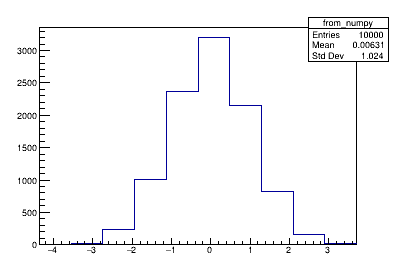

In [33]:
pyroot_file = ROOT.TFile("tmp.root")           # refresh the PyROOT file
pyroot_hist = pyroot_file.Get("from_numpy")

canvas = ROOT.TCanvas("canvas", "", 400, 300)
pyroot_hist.Draw("hist")
canvas.Draw()

In [34]:
# 2-dimensional Numpy histograms.

file["from_numpy2d"] = numpy.histogram2d(numpy.random.normal(0, 1, 10000), numpy.random.normal(0, 1, 10000))

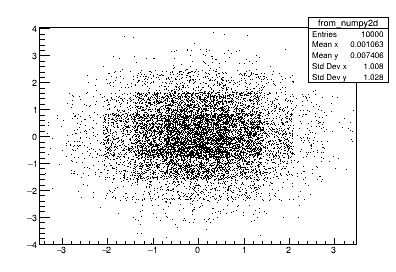

In [35]:
pyroot_file = ROOT.TFile("tmp.root")           # refresh the PyROOT file
pyroot_hist = pyroot_file.Get("from_numpy2d")

pyroot_hist.Draw()
canvas.Draw()

<br><br><br><br><br>

<p style="font-size: 1.25em">Coming soon: writing simple TTrees to ROOT files.</p>

<br><br><br><br><br>